In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [2]:
path = "/Users/grai/Data_log/"
df_original = pd.read_csv(path+'ghost_data.csv.gz')

In [3]:
df=df_original.copy()

In [4]:
df.head()

,timestamp,cp_code,request_id,obj_size,bytes_served,new_connection,origin_hit,system_buffer,hoc,gzip_unzip,ssl,cca_bbr,ocl,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
0,1.626074e+09,111,13,16097,16097,1,0,0,0,0,1,1,0,0,0,0,0,0
1,1.626074e+09,111,21,27194,27194,1,0,0,0,0,1,1,0,0,0,0,0,0
2,1.626074e+09,111,30,5719,5719,1,0,0,0,0,1,1,0,0,0,0,0,0
3,1.626074e+09,111,3e,786472,786472,1,0,0,0,0,1,1,0,30822,0,0,0,0
4,1.626074e+09,1,4a,102400,102400,1,1,0,0,1,0,1,497,5518,166,7337,82763,434


# Pre-Processing and Exploratory Data Analysis

In [5]:
df.columns

Index(['timestamp', 'cp_code', 'request_id', 'obj_size', 'bytes_served',
       'new_connection', 'origin_hit', 'system_buffer', 'hoc', 'gzip_unzip',
       'ssl', 'cca_bbr', 'ocl', 'phtm_usecs', 'gzu_usecs', 'agg_flytes',
       'cpu_flytes', 'mdt_application_usecs'],
      dtype='object')

In [6]:
df.shape

(5069268, 18)

In [8]:
df.cp_code.value_counts()

1      5069260
111          8
Name: cp_code, dtype: int64

In [9]:
df.loc[df.cp_code==111]

,timestamp,cp_code,request_id,obj_size,bytes_served,new_connection,origin_hit,system_buffer,hoc,gzip_unzip,ssl,cca_bbr,ocl,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
0,1.626074e+09,111,13,16097,16097,1,0,0,0,0,1,1,0,0,0,0,0,0
1,1.626074e+09,111,21,27194,27194,1,0,0,0,0,1,1,0,0,0,0,0,0
2,1.626074e+09,111,30,5719,5719,1,0,0,0,0,1,1,0,0,0,0,0,0
3,1.626074e+09,111,3e,786472,786472,1,0,0,0,0,1,1,0,30822,0,0,0,0
5069264,1.626075e+09,111,4d5d9f,18257,18257,1,0,0,0,0,1,1,0,353,0,0,0,0
5069265,1.626075e+09,111,4d5dad,27852,27852,1,0,0,0,0,1,1,0,339,0,0,0,0
5069266,1.626075e+09,111,4d5dbc,5723,5723,1,0,0,0,0,1,1,0,314,0,0,0,0
5069267,1.626075e+09,111,4d5dca,786472,786472,1,0,0,0,0,1,1,0,326,0,0,0,0


In [10]:
df.loc[df.cpu_flytes==0]

,timestamp,cp_code,request_id,obj_size,bytes_served,new_connection,origin_hit,system_buffer,hoc,gzip_unzip,ssl,cca_bbr,ocl,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
0,1.626074e+09,111,13,16097,16097,1,0,0,0,0,1,1,0,0,0,0,0,0
1,1.626074e+09,111,21,27194,27194,1,0,0,0,0,1,1,0,0,0,0,0,0
2,1.626074e+09,111,30,5719,5719,1,0,0,0,0,1,1,0,0,0,0,0,0
3,1.626074e+09,111,3e,786472,786472,1,0,0,0,0,1,1,0,30822,0,0,0,0
5069264,1.626075e+09,111,4d5d9f,18257,18257,1,0,0,0,0,1,1,0,353,0,0,0,0
5069265,1.626075e+09,111,4d5dad,27852,27852,1,0,0,0,0,1,1,0,339,0,0,0,0
5069266,1.626075e+09,111,4d5dbc,5723,5723,1,0,0,0,0,1,1,0,314,0,0,0,0
5069267,1.626075e+09,111,4d5dca,786472,786472,1,0,0,0,0,1,1,0,326,0,0,0,0


#### It is observed the all the data points with "cp_code" feature value as 111 are having 0 agg_flytes cpu_flytes and hence are representing represent process with no cost and highly dependent on particular request. So, these data points are required to be dropped.

In [7]:
df = df[df.cp_code!=111]

In [8]:
df.shape

(5069260, 18)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp_code', ylabel='count'>

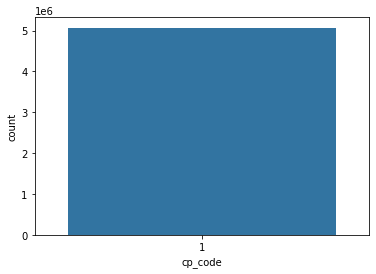

In [13]:
sns.countplot(df.cp_code)

### On exploring the data the column "cp_code" have to be dropped as it contains only one unique value after dropping the records with cp_code = 111 it is not of any use for our model.

### Dropping the "timestamp" feature as for the linear regression model for prediction of cpu flytes time may not be seen to be contributing. 

In [14]:
df.timestamp.value_counts()

1.626074e+09    80
1.626074e+09    72
1.626074e+09    59
1.626074e+09    57
1.626074e+09    56
                ..
1.626075e+09     1
1.626074e+09     1
1.626074e+09     1
1.626074e+09     1
1.626074e+09     1
Name: timestamp, Length: 565596, dtype: int64

In [9]:
df.drop(['cp_code','timestamp'],axis=1,inplace=True)

In [10]:
df.head()

,request_id,obj_size,bytes_served,new_connection,origin_hit,system_buffer,hoc,gzip_unzip,ssl,cca_bbr,ocl,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
4,4a,102400,102400,1,1,0,0,1,0,1,497,5518,166,7337,82763,434
5,58,102400,102400,1,1,0,0,1,0,1,497,987,141,1808,14799,163
6,48,102400,102400,1,1,0,0,1,0,1,497,4954,286,7128,74302,410
7,62,102400,102400,1,1,0,0,1,0,1,497,858,115,1627,12863,157
8,4f,102400,102400,1,1,0,0,1,0,1,497,4924,145,6392,73853,524


In [17]:
df.request_id.value_counts(),df.request_id.value_counts().index

(58317     1
 24a602    1
 353a2     1
 44bed5    1
 1e3dcc    1
          ..
 1d5870    1
 a06b9     1
 30c406    1
 35c9a9    1
 3a8319    1
 Name: request_id, Length: 5069260, dtype: int64,
 Index(['58317', '24a602', '353a2', '44bed5', '1e3dcc', '41e3b5', '64f6e',
        '425b7f', '1ff3fd', '1f835b',
        ...
        '4670b4', '3d8427', 'a0a9e', '31023b', '13a6b6', '1d5870', 'a06b9',
        '30c406', '35c9a9', '3a8319'],
       dtype='object', length=5069260))

## Feature "request_id" have values unique to particular request i.e. datapoints and may not be useful in our linear regression model.

In [11]:
df.drop(["request_id"],axis=1,inplace=True)

In [19]:
df.head()

,obj_size,bytes_served,new_connection,origin_hit,system_buffer,hoc,gzip_unzip,ssl,cca_bbr,ocl,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
4,102400,102400,1,1,0,0,1,0,1,497,5518,166,7337,82763,434
5,102400,102400,1,1,0,0,1,0,1,497,987,141,1808,14799,163
6,102400,102400,1,1,0,0,1,0,1,497,4954,286,7128,74302,410
7,102400,102400,1,1,0,0,1,0,1,497,858,115,1627,12863,157
8,102400,102400,1,1,0,0,1,0,1,497,4924,145,6392,73853,524


In [12]:
# Copying the original data set
df1=df.copy()

In [21]:
df.shape

(5069260, 15)

In [22]:
df.isna().sum()

obj_size                 0
bytes_served             0
new_connection           0
origin_hit               0
system_buffer            0
hoc                      0
gzip_unzip               0
ssl                      0
cca_bbr                  0
ocl                      0
phtm_usecs               0
gzu_usecs                0
agg_flytes               0
cpu_flytes               0
mdt_application_usecs    0
dtype: int64

<AxesSubplot:>

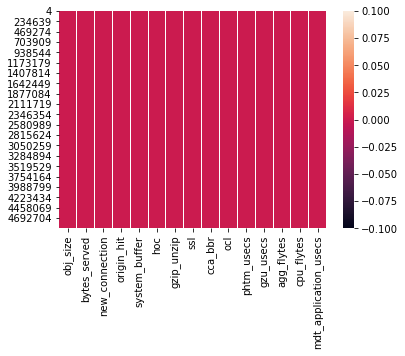

In [599]:
sns.heatmap(df.isna())

# No missing values in any feature as such is observed.



In [23]:
df.dtypes

obj_size                 int64
bytes_served             int64
new_connection           int64
origin_hit               int64
system_buffer            int64
hoc                      int64
gzip_unzip               int64
ssl                      int64
cca_bbr                  int64
ocl                      int64
phtm_usecs               int64
gzu_usecs                int64
agg_flytes               int64
cpu_flytes               int64
mdt_application_usecs    int64
dtype: object

In [24]:
df.columns

Index(['obj_size', 'bytes_served', 'new_connection', 'origin_hit',
       'system_buffer', 'hoc', 'gzip_unzip', 'ssl', 'cca_bbr', 'ocl',
       'phtm_usecs', 'gzu_usecs', 'agg_flytes', 'cpu_flytes',
       'mdt_application_usecs'],
      dtype='object')

In [25]:
df.obj_size.describe()

count    5069260.0
mean      102400.0
std            0.0
min       102400.0
25%       102400.0
50%       102400.0
75%       102400.0
max       102400.0
Name: obj_size, dtype: float64

In [26]:
df.obj_size.unique()

array([102400])

In [27]:
df.obj_size.value_counts()

102400    5069260
Name: obj_size, dtype: int64

In [28]:
df.bytes_served.unique()

array([102400])

In [29]:
df.bytes_served.value_counts()

102400    5069260
Name: bytes_served, dtype: int64

## Feature "obj_size" have no variance throughout the dataset
### Similarly for the feature bytes_served we have only one unique value of 102400 throughout the dataset and no variances are observed.

In [30]:
df.head()

,obj_size,bytes_served,new_connection,origin_hit,system_buffer,hoc,gzip_unzip,ssl,cca_bbr,ocl,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
4,102400,102400,1,1,0,0,1,0,1,497,5518,166,7337,82763,434
5,102400,102400,1,1,0,0,1,0,1,497,987,141,1808,14799,163
6,102400,102400,1,1,0,0,1,0,1,497,4954,286,7128,74302,410
7,102400,102400,1,1,0,0,1,0,1,497,858,115,1627,12863,157
8,102400,102400,1,1,0,0,1,0,1,497,4924,145,6392,73853,524


#### The values of all the data points are same for both features "obj_size" and "bytes_served" so combining the feature i.e. “bytes_served” and “obj_size” to form "bytes_served+obj_size” or also one can be dropped as the coefficients for interpretation will be same for the both.

In [13]:
df.drop(["bytes_served"],axis=1,inplace=True)

In [14]:
df.head()

,obj_size,new_connection,origin_hit,system_buffer,hoc,gzip_unzip,ssl,cca_bbr,ocl,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
4,102400,1,1,0,0,1,0,1,497,5518,166,7337,82763,434
5,102400,1,1,0,0,1,0,1,497,987,141,1808,14799,163
6,102400,1,1,0,0,1,0,1,497,4954,286,7128,74302,410
7,102400,1,1,0,0,1,0,1,497,858,115,1627,12863,157
8,102400,1,1,0,0,1,0,1,497,4924,145,6392,73853,524


## Going through all the feature and checking for the unique values



In [33]:
for i in df.columns:
    print(df[i].value_counts())

102400    5069260
Name: obj_size, dtype: int64
1    5069260
Name: new_connection, dtype: int64
0    5068260
1       1000
Name: origin_hit, dtype: int64
0    5026429
1      42831
Name: system_buffer, dtype: int64
1    5025429
0      43831
Name: hoc, dtype: int64
1    5069260
Name: gzip_unzip, dtype: int64
0    5069260
Name: ssl, dtype: int64
1    5069260
Name: cca_bbr, dtype: int64
497    5069260
Name: ocl, dtype: int64
559     41815
558     41606
557     41536
556     41452
562     41340
        ...  
1021        1
1020        1
1011        1
1010        1
4017        1
Name: phtm_usecs, Length: 719, dtype: int64
117    131840
116    131498
118    131461
115    130848
119    130031
        ...  
260         1
259         1
255         1
252         1
309         1
Name: gzu_usecs, Length: 205, dtype: int64
1309    35248
1313    35230
1318    35098
1311    35049
1320    35024
        ...  
2247        1
2244        1
2245        1
2242        1
7504        1
Name: agg_flytes, Length: 12

## Drop features ["new_connection","gzip_unzip","ssl","cca_bbr","ocl"] since it has only 1 unique value as all the connections are new connections so, no variace will cause the model to blow off.

In [15]:
df.drop(["new_connection","gzip_unzip","ssl","cca_bbr","ocl"],axis=1,inplace=True)

In [16]:
df.head()

,obj_size,origin_hit,system_buffer,hoc,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
4,102400,1,0,0,5518,166,7337,82763,434
5,102400,1,0,0,987,141,1808,14799,163
6,102400,1,0,0,4954,286,7128,74302,410
7,102400,1,0,0,858,115,1627,12863,157
8,102400,1,0,0,4924,145,6392,73853,524


In [17]:
df.phtm_usecs.describe()

count    5.069260e+06
mean     5.676434e+02
std      5.298099e+01
min      3.810000e+02
25%      5.320000e+02
50%      5.640000e+02
75%      5.990000e+02
max      5.548000e+03
Name: phtm_usecs, dtype: float64

In [18]:
#Outlier detection using 1.5 IQR Rule

def outlier_limits(arr):
    IQR= arr.quantile(.75)-arr.quantile(.25)
    return arr.quantile(.25)-1.5*IQR, arr.quantile(.75)+1.5*IQR

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


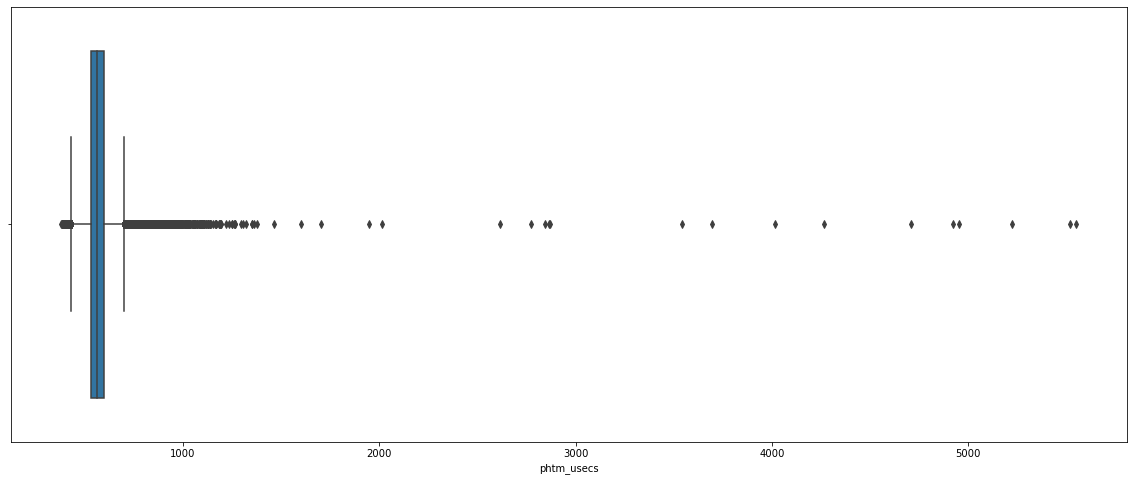

In [40]:
plt.figure(figsize = (20,8))
sns.boxplot(df.phtm_usecs);

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='phtm_usecs', ylabel='Density'>

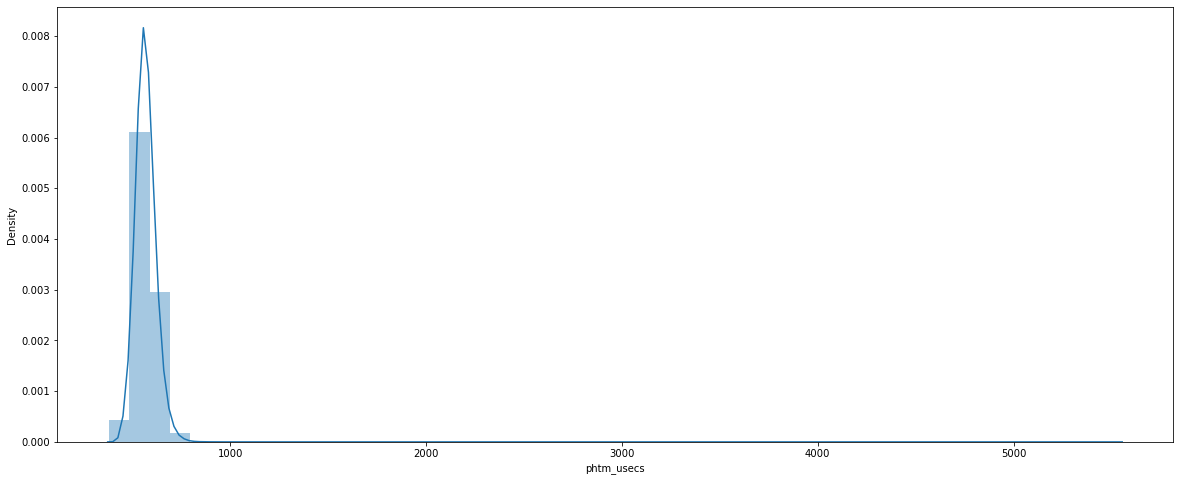

In [41]:
plt.figure(figsize = (20,8))
sns.distplot(df.phtm_usecs)

In [19]:
outlier_limits(df.phtm_usecs)

(431.5, 699.5)

In [20]:
df.loc[(df.phtm_usecs>699.5)|(df.phtm_usecs<431.5)]

,obj_size,origin_hit,system_buffer,hoc,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
4,102400,1,0,0,5518,166,7337,82763,434
5,102400,1,0,0,987,141,1808,14799,163
6,102400,1,0,0,4954,286,7128,74302,410
7,102400,1,0,0,858,115,1627,12863,157
8,102400,1,0,0,4924,145,6392,73853,524
...,...,...,...,...,...,...,...,...,...
5069052,102400,0,0,1,738,113,1515,22958,197
5069053,102400,0,0,1,721,105,1495,22430,193
5069061,102400,0,0,1,718,151,1544,23706,152
5069102,102400,0,0,1,774,112,1557,24088,186


#### Their are a large no. of outliers present in feature "phtm_usecs" and the outliers using 1.5 IQR rule the no. of outlier are 79834 so we need to handle these outliers after learning more on exploration.
First thing is to check is its association with the rest of the features and identify the other features behaviour for the outliers of this feature.
Correlation with the dependent variable.
Can a new feature be formed that can tackle these outliers.
Is any transformation is required.
##### Tackling outliers by capping the values or removing the datapoints with the outliers, later will be better in this scenario as linear regression model is sensitive to outliers and we have a large no. of datapoints.

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


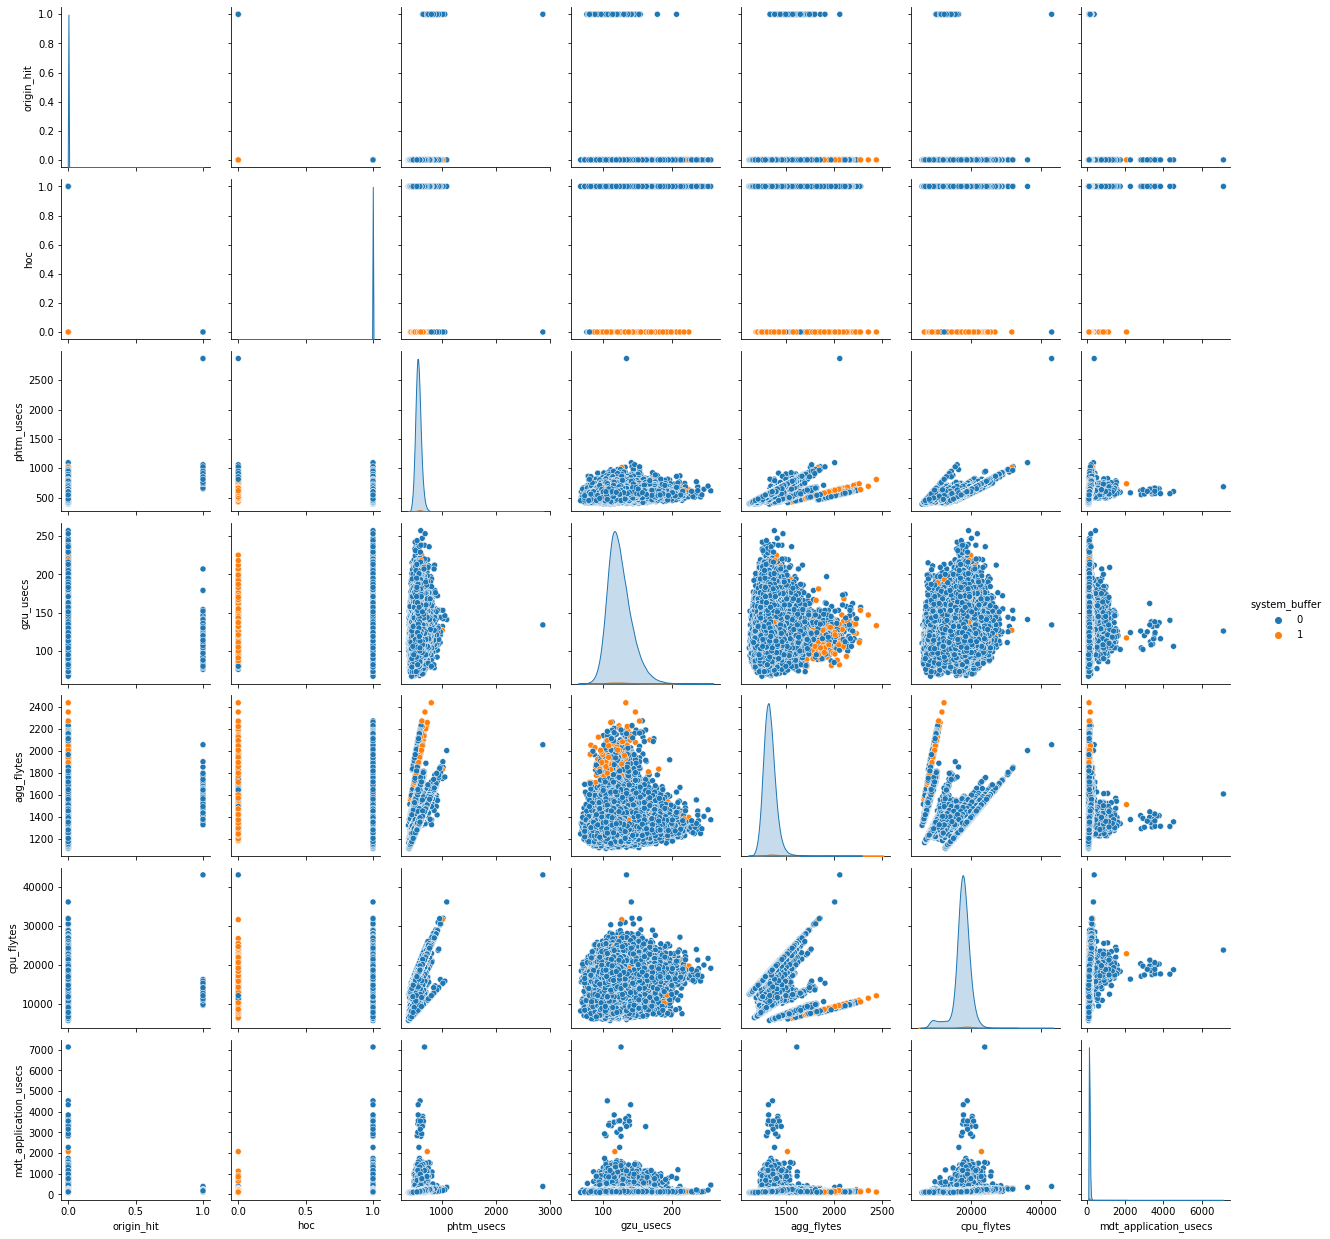

In [46]:
sns.pairplot(df.iloc[:,1:].sample(400000),hue="system_buffer")

# It can be clearly seen that feature distribution are mostly leptokurtic which is generally seen in Financial Data sets.
### Features "hoc" and "system_buffer" are highly inversely correlated as they are mutually exclusive so we need to combine them to one feature.
### Feature "mdt_application_usecs" show some peculier behaviour with not much association with any other variables but is contributing to the flytes, still have large unexplained behaviour and needed a very close look on outliers in the datasets in this feature. 
#### "cpu_flytes" doesnot show as such much association with "origin_hit" and "hoc" and some random scatterplots are seen. 

<AxesSubplot:xlabel='phtm_usecs', ylabel='cpu_flytes'>

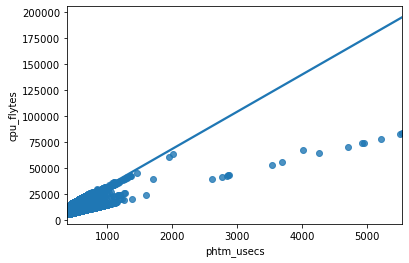

In [47]:
sns.regplot(x="phtm_usecs",y="cpu_flytes",data=df)

### Feature "cpu_flytes" does linearly depend upon "phtm_usecs" but their are some outliers present which are required to be handled. 

<AxesSubplot:xlabel='gzu_usecs', ylabel='cpu_flytes'>

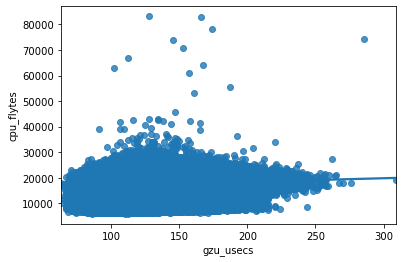

In [48]:
sns.regplot(x="gzu_usecs",y="cpu_flytes",data=df)

### Feature "cpu_flytes" is slightly correlated with "gzu_usecs".

<AxesSubplot:xlabel='agg_flytes', ylabel='cpu_flytes'>

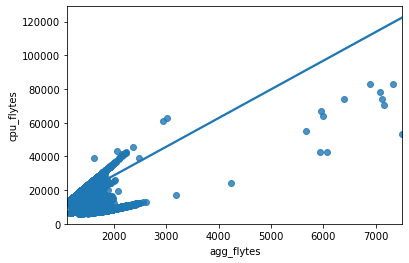

In [49]:
sns.regplot(x="agg_flytes",y="cpu_flytes",data=df)

### Feature "cpu_flytes" does linearly depend upon "agg_flytes" but their are some outliers present which are required to be handled.

<AxesSubplot:xlabel='mdt_application_usecs', ylabel='cpu_flytes'>

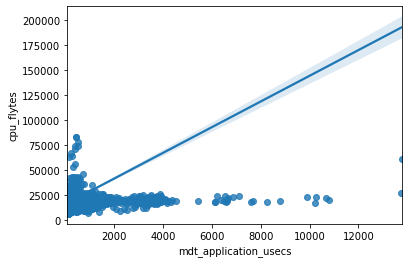

In [50]:
sns.regplot(x="mdt_application_usecs",y="cpu_flytes",data=df)

### Feature "cpu_flytes" does show some association with "mdt_application_usecs" but their are large no. of outliers present which are required to be handled.

<AxesSubplot:xlabel='origin_hit', ylabel='cpu_flytes'>

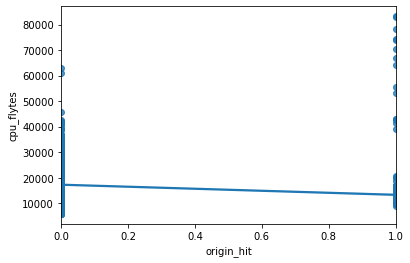

In [51]:
sns.regplot(x="origin_hit",y="cpu_flytes",data=df)

### Small negative association of feature "origin_hit" with "cpu_flytes" is seen.

<AxesSubplot:xlabel='hoc', ylabel='cpu_flytes'>

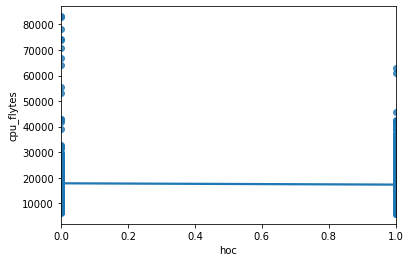

In [52]:
sns.regplot(x="hoc",y="cpu_flytes",data=df)

## Since, feature "agg_flytes" is just a representation of our response variable "cpu_flytes" we can drop "agg_flytes" as it is a dependent variable.

In [21]:
df.corr()

,obj_size,origin_hit,system_buffer,hoc,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
obj_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origin_hit,NaN,1.000000,-0.001297,-0.150406,0.083415,-0.006939,0.068374,-0.022613,0.007152
system_buffer,NaN,-0.001297,1.000000,-0.988428,0.053012,0.016731,0.082097,0.023106,-0.002318
hoc,NaN,-0.150406,-0.988428,1.000000,-0.065062,-0.015488,-0.091535,-0.019413,0.001207
phtm_usecs,NaN,0.083415,0.053012,-0.065062,1.000000,0.076376,0.859230,0.766395,0.343850
gzu_usecs,NaN,-0.006939,0.016731,-0.015488,0.076376,1.000000,0.054986,0.100986,0.027818
agg_flytes,NaN,0.068374,0.082097,-0.091535,0.859230,0.054986,1.000000,0.465743,0.294202
cpu_flytes,NaN,-0.022613,0.023106,-0.019413,0.766395,0.100986,0.465743,1.000000,0.269181
mdt_application_usecs,NaN,0.007152,-0.002318,0.001207,0.343850,0.027818,0.294202,0.269181,1.000000


<AxesSubplot:>

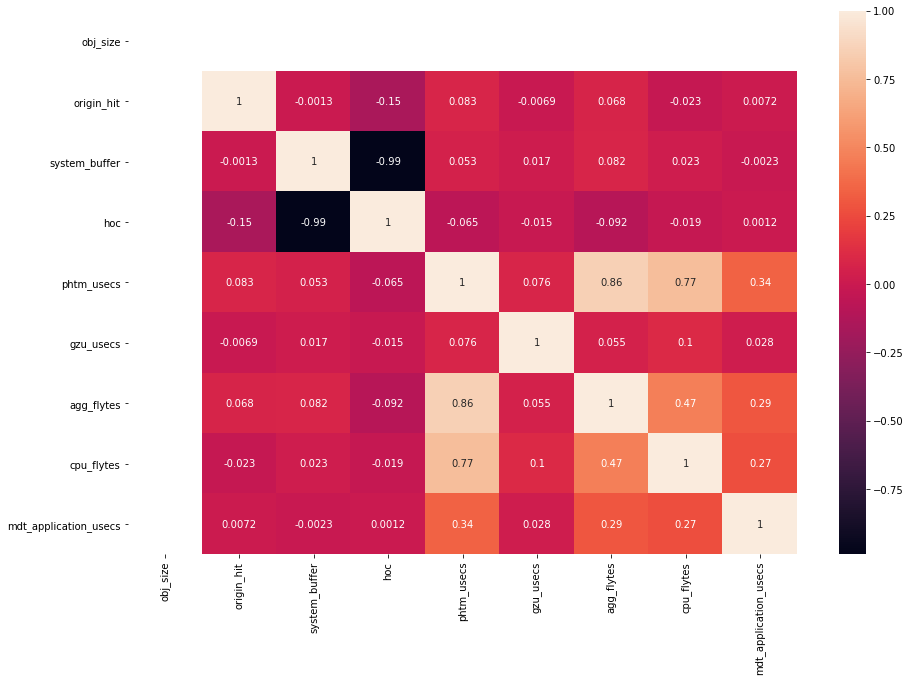

In [56]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot=True)

### We need to carry out outlier treatement first and then look for correlation.
### Features "hoc" and "system_buffer" are highly negative correlated and they need to be combined to form a new feature.
### It can be noticed that feature ["hoc" and "origin_hit"] are negatively correlated with "cpu_flytes" and rest of the features have positive correlation with the "cpu_flytes".

In [57]:
df.head()

,obj_size,origin_hit,system_buffer,hoc,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
4,102400,1,0,0,5518,166,7337,82763,434
5,102400,1,0,0,987,141,1808,14799,163
6,102400,1,0,0,4954,286,7128,74302,410
7,102400,1,0,0,858,115,1627,12863,157
8,102400,1,0,0,4924,145,6392,73853,524


In [22]:
df_without_outlier_treatement=df.copy()

## Handling all the outliers and checking out the distributions

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='phtm_usecs', ylabel='Density'>

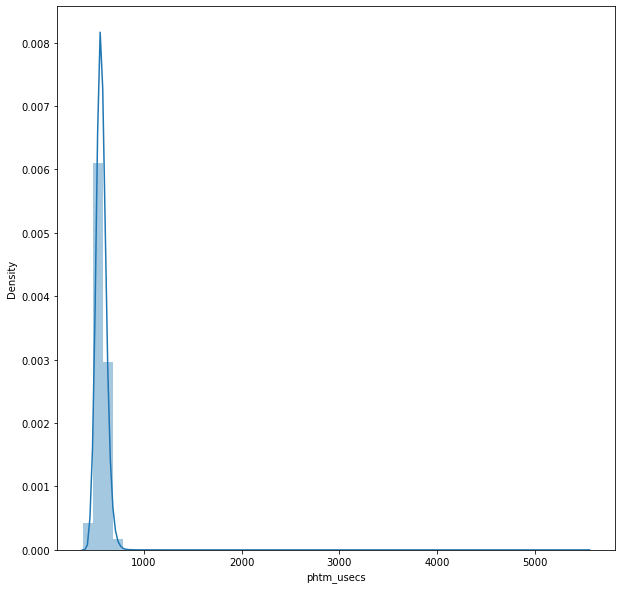

In [234]:
plt.figure(figsize=(10,10))
sns.distplot(df.phtm_usecs)

In [26]:
lim=outlier_limits(df.phtm_usecs)
lim

(434.5, 694.5)

In [27]:
df=df[(df.phtm_usecs>=lim[0])&(df.phtm_usecs<=lim[1])]

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='phtm_usecs', ylabel='Density'>

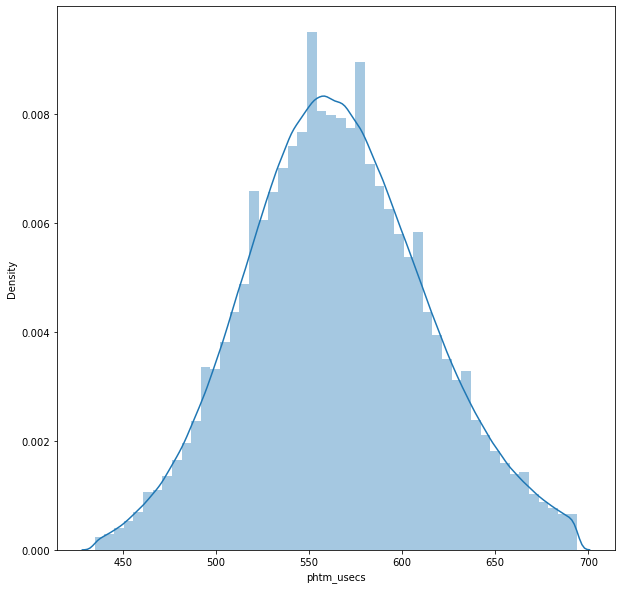

In [243]:
plt.figure(figsize=(10,10))
sns.distplot(df.phtm_usecs)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='phtm_usecs'>

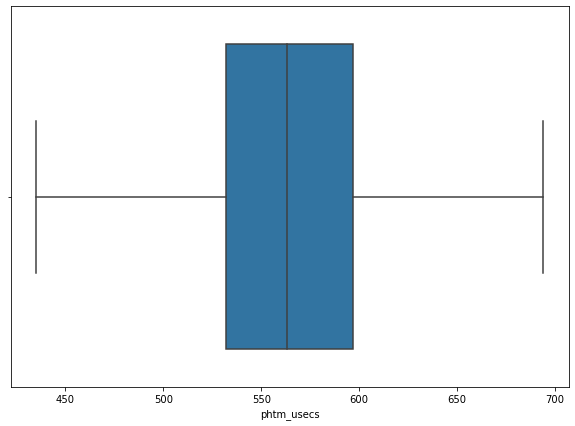

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(df.phtm_usecs)

In [29]:
lim=outlier_limits(df.gzu_usecs)
lim

(79.0, 167.0)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gzu_usecs'>

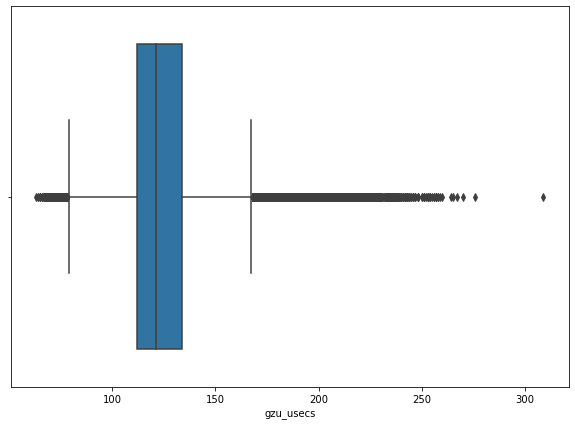

In [30]:
plt.figure(figsize=(10,7))
sns.boxplot(df.gzu_usecs)

In [31]:
df=df[(df.gzu_usecs>=lim[0])&(df.gzu_usecs<=lim[1])]

In [32]:
lim=outlier_limits(df.mdt_application_usecs)
lim

(79.0, 183.0)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mdt_application_usecs'>

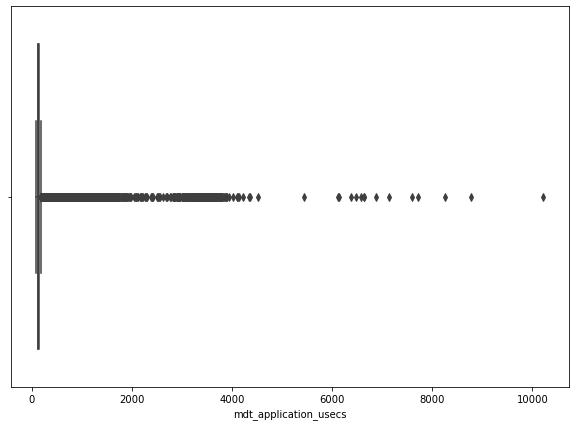

In [33]:
plt.figure(figsize=(10,7))
sns.boxplot(df.mdt_application_usecs)

In [34]:
df[(df.mdt_application_usecs<lim[0])|(df.mdt_application_usecs>lim[1])]

,obj_size,origin_hit,system_buffer,hoc,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs
1049,102400,0,1,0,564,108,1869,8454,187
1260,102400,0,1,0,606,96,2113,10095,189
1314,102400,0,1,0,682,120,2144,10224,226
1499,102400,0,0,1,668,118,2112,10015,190
1509,102400,0,1,0,649,114,2066,9729,187
...,...,...,...,...,...,...,...,...,...
5069206,102400,0,0,1,611,141,1369,19050,186
5069216,102400,0,0,1,627,125,1384,19522,189
5069238,102400,0,0,1,638,129,1399,19863,211
5069254,102400,0,0,1,614,129,1370,19097,193


In [35]:
df.shape

(4876387, 9)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mdt_application_usecs', ylabel='Density'>

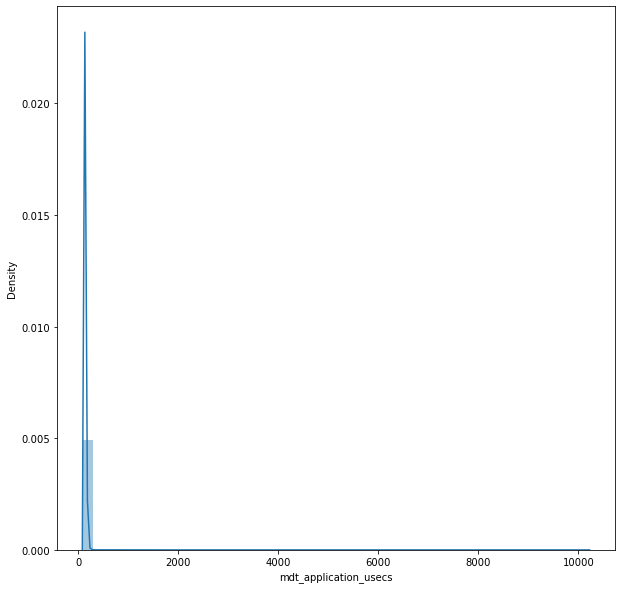

In [36]:
plt.figure(figsize=(10,10))
sns.distplot(df.mdt_application_usecs)

In [37]:
df=df[(df.mdt_application_usecs>=lim[0])&(df.mdt_application_usecs<=lim[1])]

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mdt_application_usecs'>

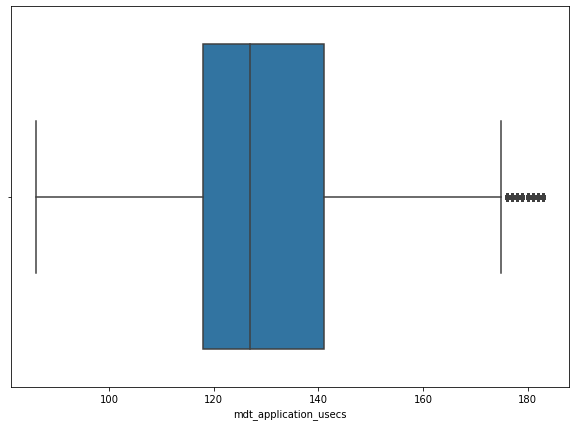

In [38]:
plt.figure(figsize=(10,7))
sns.boxplot(df.mdt_application_usecs)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mdt_application_usecs', ylabel='Density'>

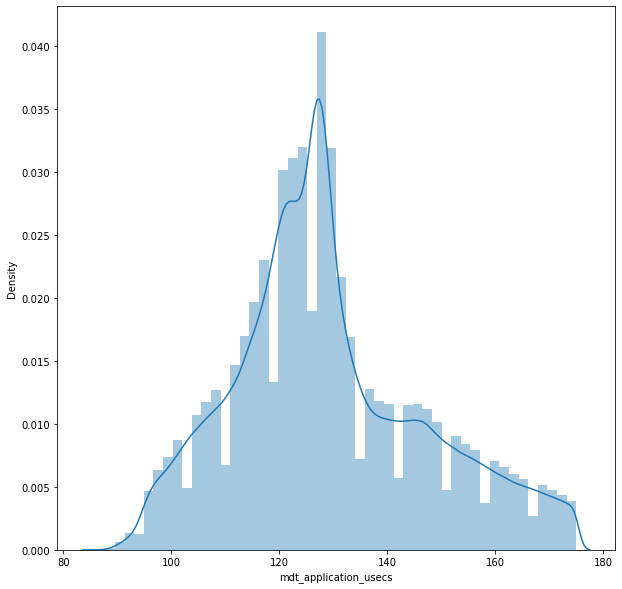

In [258]:
plt.figure(figsize=(10,10))
sns.distplot(df.mdt_application_usecs)

### Need to handle the distribution of "mdt_application_usecs" as its peculiar and may cause issues with our assumptions in Linear Regression Model

In [42]:
lim=outlier_limits(df.cpu_flytes)
lim

(13509.0, 21629.0)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cpu_flytes', ylabel='Density'>

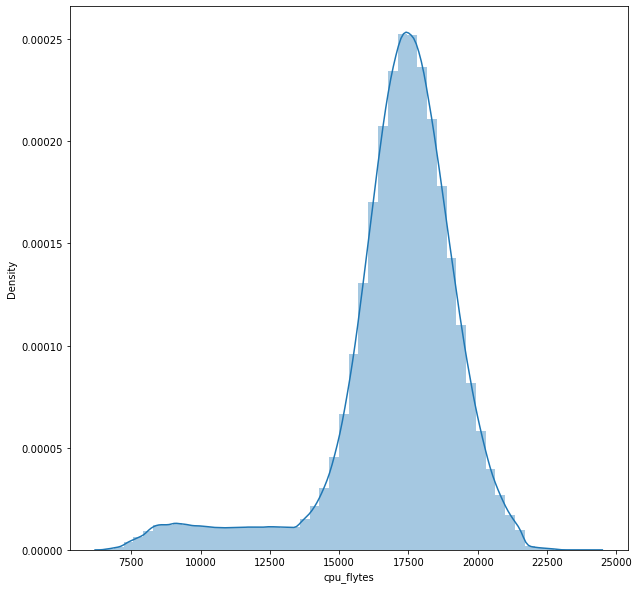

In [260]:
plt.figure(figsize=(10,10))
sns.distplot(df.cpu_flytes)

In [43]:
df=df[(df.cpu_flytes>=lim[0])&(df.cpu_flytes<=lim[1])]

In [44]:
df.shape

(4390319, 9)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cpu_flytes'>

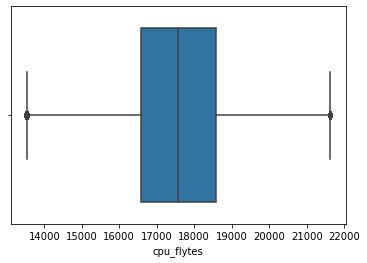

In [45]:
sns.boxplot(df.cpu_flytes)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cpu_flytes', ylabel='Density'>

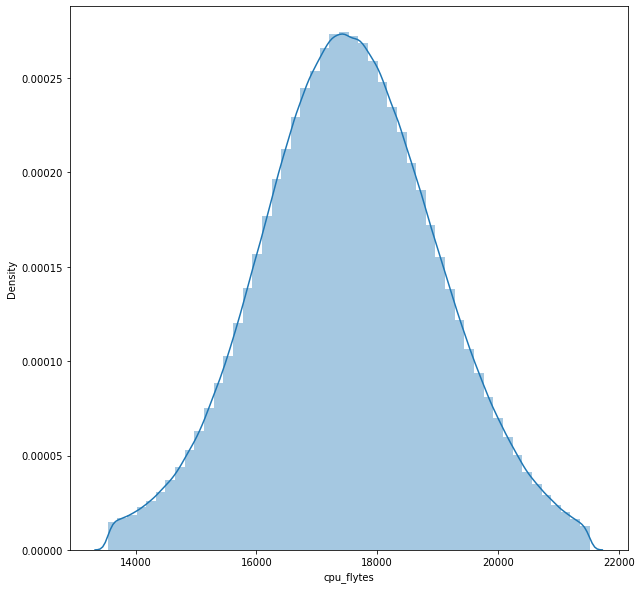

In [266]:
plt.figure(figsize=(10,10))
sns.distplot(df.cpu_flytes)

In [103]:
df.mdt_application_usecs.describe()

count    4.425095e+06
mean     1.308517e+02
std      1.888402e+01
min      8.600000e+01
25%      1.190000e+02
50%      1.270000e+02
75%      1.420000e+02
max      1.830000e+02
Name: mdt_application_usecs, dtype: float64

In [46]:
lim=outlier_limits(df.mdt_application_usecs)
lim

(84.5, 176.5)

In [47]:
df=df[(df.mdt_application_usecs>=lim[0])&(df.mdt_application_usecs<=lim[1])]

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mdt_application_usecs', ylabel='Density'>

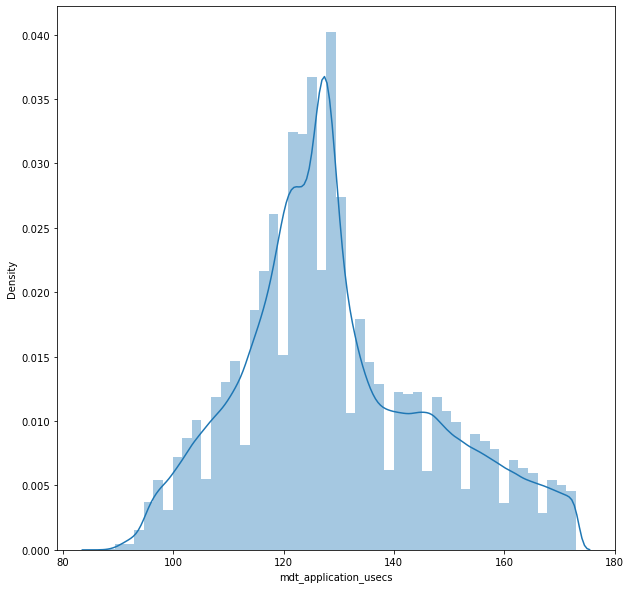

In [271]:
plt.figure(figsize=(10,10))
sns.distplot(df.mdt_application_usecs)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mdt_application_usecs', ylabel='Density'>

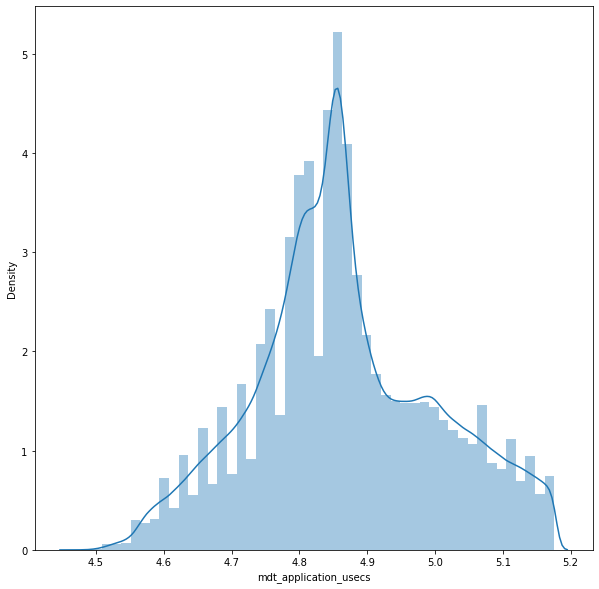

In [137]:
plt.figure(figsize=(10,10))
sns.distplot(np.log(df.mdt_application_usecs+1))

In [48]:
def diagnostic_plot(variable):
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    variable.hist()
    
    plt.subplot(1,2,2)
    scipy.stats.probplot(variable,dist="norm",plot=plt)
    plt.show()

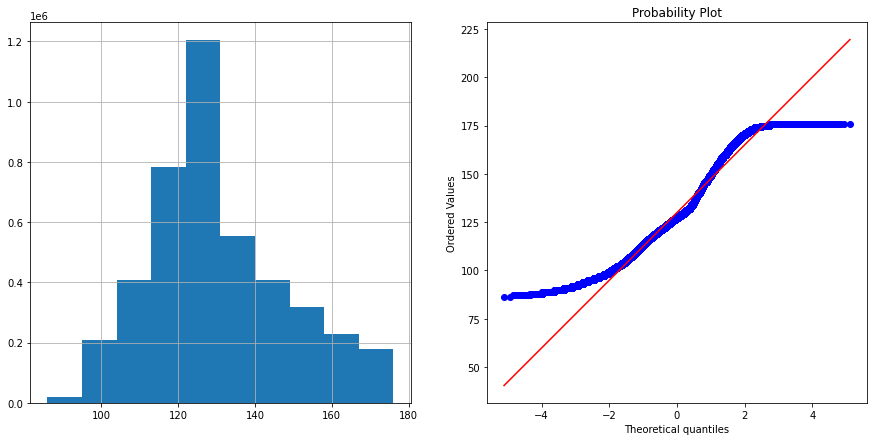

In [49]:
diagnostic_plot(df["mdt_application_usecs"])

### Applying transformations for making the "mdt_application_usecs" to gaussian distribution.

### Feature "mdt_application_usecs" is having a peculiar distribution plot and need to work on using box-cox transformation.
y = (x**lmbda - 1) / lmbda, for lmbda != 0
log(x), for lmbda = 0
### boxcox requires the input data to be positive. Sometimes a Box-Cox transformation provides a shift parameter to achieve this; boxcox does not. Such a shift parameter is equivalent to adding a positive constant to x before calling boxcox.
The confidence limits returned when alpha is provided give the interval where:
with llf the log-likelihood function and the chi-squared function.

Optimal lamda: -0.5468862367009347


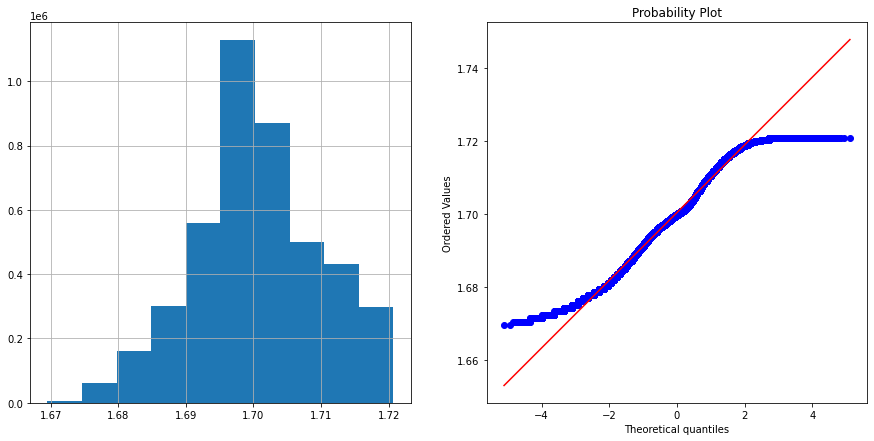

In [50]:
boxcox, param= scipy.stats.boxcox(df.mdt_application_usecs+1)
print("Optimal lamda:",param)
diagnostic_plot(pd.Series(boxcox))

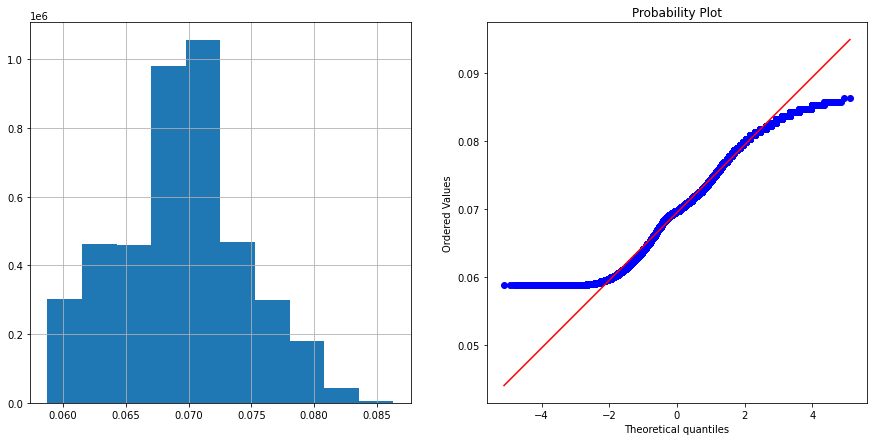

In [276]:
diagnostic_plot(df.mdt_application_usecs**-0.55)

## So we can apply the boxcox transformation on "mdt_application_usecs" of power  and move on with our model

In [51]:
df["boxcox_mdt_application_usecs"]=boxcox
df.head()

<ipython-input-51-1b5396506e3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["boxcox_mdt_application_usecs"]=boxcox


,obj_size,origin_hit,system_buffer,hoc,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,mdt_application_usecs,boxcox_mdt_application_usecs
115285,102400,0,0,1,676,89,1533,13905,168,1.717947
137433,102400,0,0,1,675,120,1532,13883,147,1.709624
146830,102400,0,0,1,657,109,1515,13512,147,1.709624
147600,102400,0,0,1,657,110,1515,13512,166,1.717225
152445,102400,0,0,1,619,125,1496,14146,133,1.702983


In [52]:
df.drop(["mdt_application_usecs"],axis=1,inplace=True)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


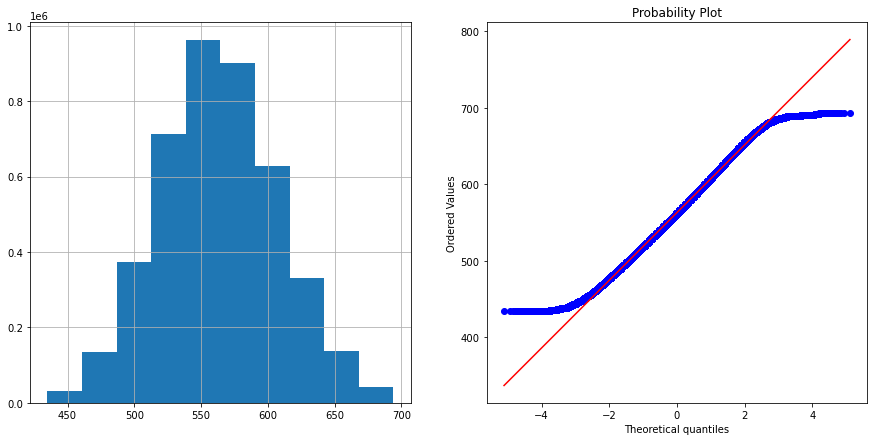

In [279]:
diagnostic_plot(df.phtm_usecs)

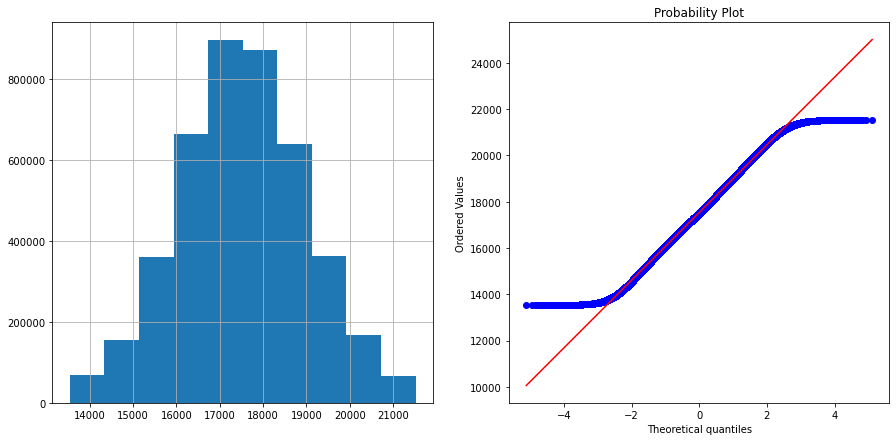

In [280]:
diagnostic_plot(df.cpu_flytes)

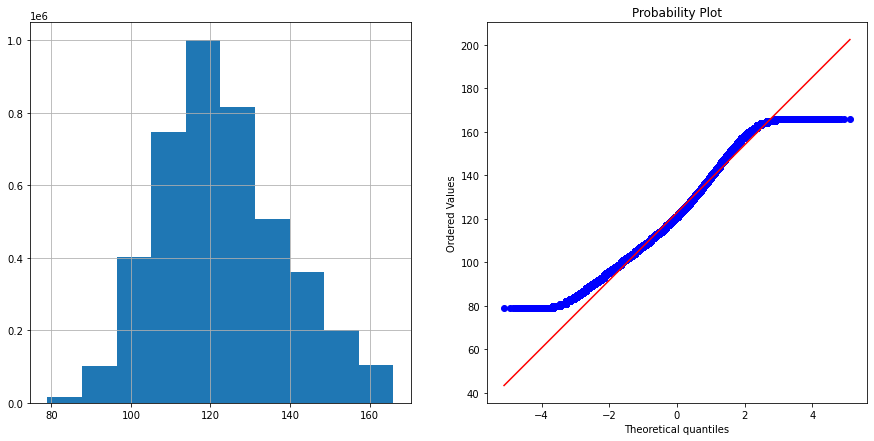

In [283]:
diagnostic_plot(df.gzu_usecs)

In [282]:
df.origin_hit.unique(),df.origin_hit.value_counts()

(array([0]),
 0    4252569
 Name: origin_hit, dtype: int64)

### Since, features "obj_size" and "origin_hit" have only one unique values we need to drop the two features as their is no variance and no correlation can be established. 

In [53]:
df.drop(["origin_hit","obj_size"],axis=1,inplace=True)

In [285]:
df.corr()

,system_buffer,hoc,phtm_usecs,gzu_usecs,agg_flytes,cpu_flytes,boxcox_mdt_application_usecs
system_buffer,1.000000,-1.000000,0.060180,0.014387,0.058012,0.055390,-0.003677
hoc,-1.000000,1.000000,-0.060180,-0.014387,-0.058012,-0.055390,0.003677
phtm_usecs,0.060180,-0.060180,1.000000,0.051677,0.962640,0.929795,0.606893
gzu_usecs,0.014387,-0.014387,0.051677,1.000000,0.053943,0.055532,0.028980
agg_flytes,0.058012,-0.058012,0.962640,0.053943,1.000000,0.873202,0.585617
cpu_flytes,0.055390,-0.055390,0.929795,0.055532,0.873202,1.000000,0.567101
boxcox_mdt_application_usecs,-0.003677,0.003677,0.606893,0.028980,0.585617,0.567101,1.000000


<AxesSubplot:>

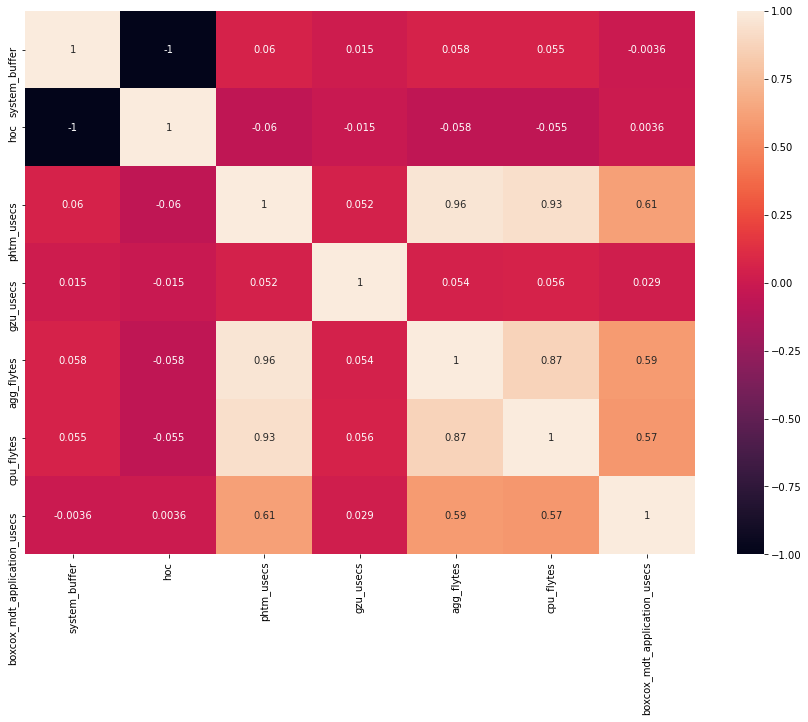

In [54]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot=True)

### Need to combine "hoc" and "system buffer" as 1 feature as "system_buffer_&_hoc"
### Need to drop "agg_flytes" as it can be seen from correlation plot and also from domain knowledge it is known that it is also representation of dependent variable "cpu_flytes".
### Increase in the correlation of independent variable "mdt_application_usecs" with "cpu_flytes" is seen after outlier treatement and transformation.
### Increase in the correlation between "phtm_usecs" and "cpu_flytes" is seen on outlier treatement.


In [55]:
df["system_buffer_&_hoc"]=df.system_buffer
df.drop(["hoc","system_buffer","agg_flytes"],axis=1,inplace=True)


<ipython-input-55-03ab7c370d22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["system_buffer_&_hoc"]=df.system_buffer


## Independent variable correlation plot

<AxesSubplot:>

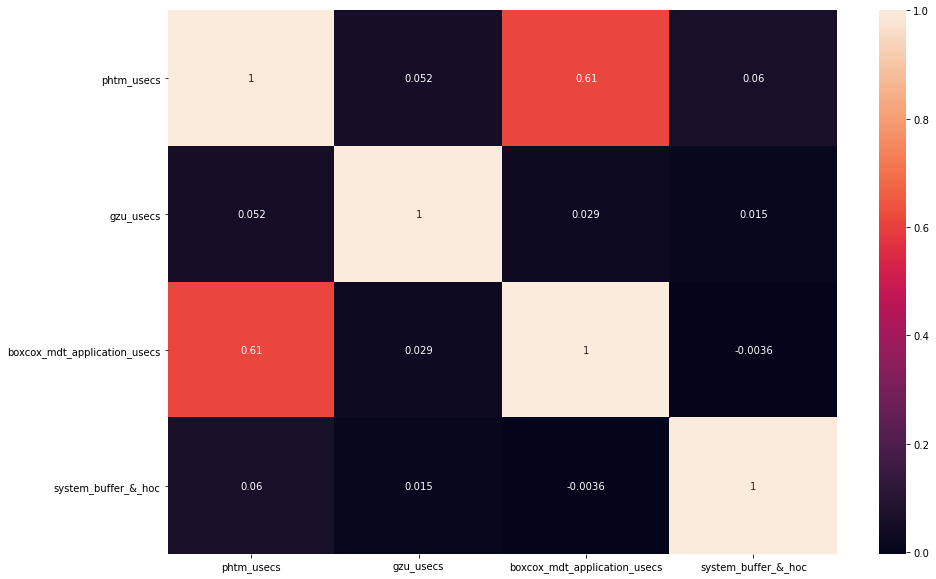

In [56]:
plt.figure(figsize = (15,10))
sns.heatmap(df.drop("cpu_flytes",axis=1).corr(),annot=True)

In [57]:
df.head()

,phtm_usecs,gzu_usecs,cpu_flytes,boxcox_mdt_application_usecs,system_buffer_&_hoc
115285,676,89,13905,1.717947,0
137433,675,120,13883,1.709624,0
146830,657,109,13512,1.709624,0
147600,657,110,13512,1.717225,0
152445,619,125,14146,1.702983,0


## Checking distribution of the response variable "cpu_flytes".

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cpu_flytes', ylabel='Density'>

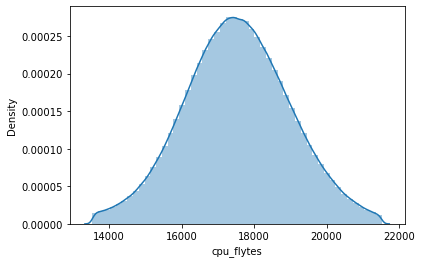

In [290]:
sns.distplot((df.cpu_flytes))

## checking the plot after log transformation and their is some non-normality can be seen at the edges

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cpu_flytes', ylabel='Density'>

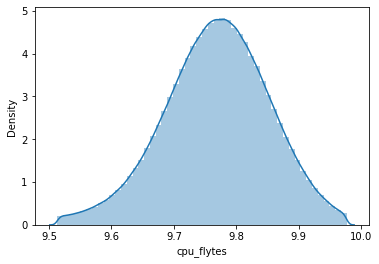

In [291]:
sns.distplot(np.log(df.cpu_flytes))

## Their is not as such improvement after log transformation in the distribution is seen.

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cpu_flytes'>

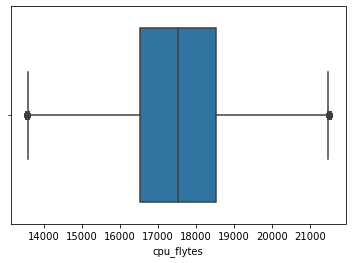

In [292]:
sns.boxplot((df.cpu_flytes))

### Since, we still see some outliers in cpu_flytes we want to handel those outliers stricly by removing them and preventing the normality assumption violation for our model.

In [58]:
lim=outlier_limits(df.cpu_flytes)
lim

(13575.0, 21519.0)

In [59]:
df=df[(df.cpu_flytes>=lim[0])&(df.phtm_usecs<=lim[1])]

In [60]:
df.shape

(4307851, 5)

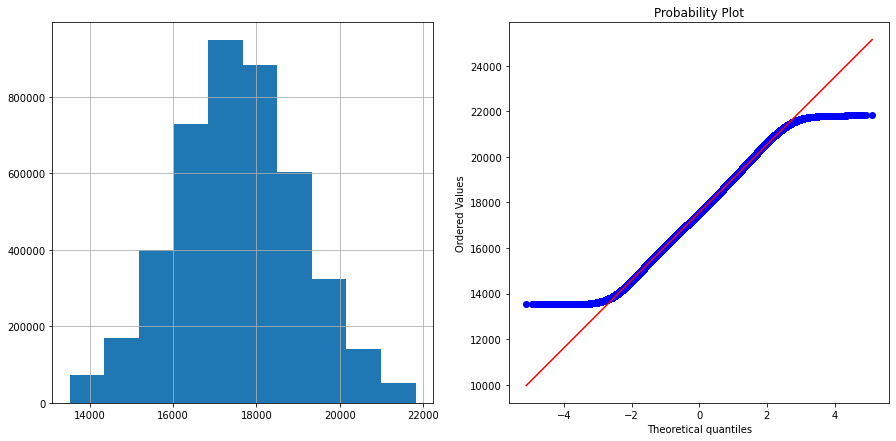

In [181]:
diagnostic_plot(df.cpu_flytes)

In [296]:
df.head()

,phtm_usecs,gzu_usecs,cpu_flytes,boxcox_mdt_application_usecs,system_buffer_&_hoc
115285,676,89,13905,2.059910,0
137433,675,120,13883,2.045075,0
152445,619,125,14146,2.033393,0
152634,595,153,13598,2.047373,0
152635,597,135,13643,2.055952,0


### It can be seen from the above correlation heat map that the all the feature are within the desired range of multi-collinearity and hence we can now proceed with the normalization,  checking for the assumptions and ML model.

## Before going to fit the model we are going to normalize our model for all the continuous variables present in the dataset and make a function to convert back our coefficent obtained from the model for removing the normalization effects for interpretation.
## Plotting the residual plot after fitting the model using ols of statsmodel.api library
## Following assumptions are required to be satisfied which we are going to varify through different methods:
1. Linear Relationship: There must be a linear relationship between the dependent variable and the independent variables.
2. No Multicollinearity: The independent variables are not highly correlated with each other.
3. Normality of Residuals: The residuals are normally distributed.
4. Homoscedasticity: The variance of error terms are similar across the values of the independent variables.


### We are required to drop the "obj_size" feature as it has the same values throughout the dataset and copy out dataset and also store maximum and minimum values so that we can use it for de - normalization of final coefficents for interpretation purposes. 

In [61]:
df_after_feature_engg=df.copy()

In [62]:
df_after_feature_engg.head()

,phtm_usecs,gzu_usecs,cpu_flytes,boxcox_mdt_application_usecs,system_buffer_&_hoc
115285,676,89,13905,1.717947,0
137433,675,120,13883,1.709624,0
152445,619,125,14146,1.702983,0
152634,595,153,13598,1.710922,0
152635,597,135,13643,1.715739,0


In [74]:
coeff_multiplier={}
for i in df.columns:
    if i !="cpu_flytes":
        coeff_multiplier[i]=max(df[i])-min(df[i])
print(coeff_multiplier)

{'phtm_usecs': 259, 'gzu_usecs': 88, 'boxcox_mdt_application_usecs': 0.05117899842056395, 'system_buffer_&_hoc': 1}


## Normalizing the features and taking log of response variable "cpu_flytes"

In [75]:
# Defining the normalizing function
def normalize_(arr):
    return (arr-min(arr))/(max(arr)-min(arr))

In [76]:
# Normalizing all the columns except response variable 
for i in df.columns:
    if i!= "cpu_flytes":
        df["norm_"+i]=normalize_(df[i])
df.head()

,phtm_usecs,gzu_usecs,cpu_flytes,boxcox_mdt_application_usecs,system_buffer_&_hoc,norm_phtm_usecs,norm_gzu_usecs,norm_boxcox_mdt_application_usecs,norm_system_buffer_&_hoc
115285,676,89,13905,1.717947,0,0.930502,0.113636,0.946031,0.0
137433,675,120,13883,1.709624,0,0.926641,0.465909,0.783406,0.0
152445,619,125,14146,1.702983,0,0.710425,0.522727,0.653645,0.0
152634,595,153,13598,1.710922,0,0.617761,0.840909,0.808765,0.0
152635,597,135,13643,1.715739,0,0.625483,0.636364,0.902889,0.0


In [77]:
# Taking log of reponse variable "cpu_flytes"
df["log_cpu_flytes"]=np.log(df.cpu_flytes)

In [78]:
# dropping the columns not required
df.drop(["cpu_flytes","phtm_usecs","gzu_usecs","boxcox_mdt_application_usecs","system_buffer_&_hoc"],axis=1,inplace=True)

In [79]:
df.head()

,norm_phtm_usecs,norm_gzu_usecs,norm_boxcox_mdt_application_usecs,norm_system_buffer_&_hoc,log_cpu_flytes
115285,0.930502,0.113636,0.946031,0.0,9.540004
137433,0.926641,0.465909,0.783406,0.0,9.538420
152445,0.710425,0.522727,0.653645,0.0,9.557187
152634,0.617761,0.840909,0.808765,0.0,9.517678
152635,0.625483,0.636364,0.902889,0.0,9.520982


In [80]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [81]:
df.columns

Index(['norm_phtm_usecs', 'norm_gzu_usecs',
       'norm_boxcox_mdt_application_usecs', 'norm_system_buffer_&_hoc',
       'log_cpu_flytes'],
      dtype='object')

In [82]:
df.rename(columns={"norm_system_buffer_&_hoc": 'norm_system_buffer_hoc'},inplace=True) #here parameter columns is a dictionary


In [83]:
df.columns

Index(['norm_phtm_usecs', 'norm_gzu_usecs',
       'norm_boxcox_mdt_application_usecs', 'norm_system_buffer_hoc',
       'log_cpu_flytes'],
      dtype='object')

### Ordinary Least Squares

In [84]:
#fit multiple linear regression model
model = ols('log_cpu_flytes ~ norm_phtm_usecs + norm_gzu_usecs + norm_boxcox_mdt_application_usecs + norm_system_buffer_hoc',data = df).fit()

#view model summary

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_cpu_flytes   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.314e+06
Date:                Wed, 14 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:12:44   Log-Likelihood:             8.6757e+06
No. Observations:             4307851   AIC:                        -1.735e+07
Df Residuals:                 4307846   BIC:                        -1.735e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

### Here, -ve coeff. are actually the representation of relationship between the feature and response variable and coeff. values are taken as mod of its value that is magnitude of the values sign is not significant for our purposes of determinig the feature cost and hence the sign is ignored as the negative sign is expected due to its correlation.
### A regression coefficient “with an algebraic sign that is the opposite of that expected” indicates “the presence of serious multicollinearity.”


# Null Hypothesis H0: The coefficient is not significant.
# Alternate hypothesis Ha: The coefficient is significant and can be considered for the required purposes.
## P - value : Partial F Test 
## A partial F-test calculates the following F test-statistic:
### F = ((RSSreduced – RSSfull)/p)  /  (RSSfull/n-k)
#### where:
RSSreduced: The residual sum of squares of the reduced (i.e. “nested”) model.
RSSfull: The residual sum of squares of the full model.
p: The number of predictors removed from the full model.
n: The total observations in the dataset.
k: The number of coefficients (including the intercept) in the full model.
### If the p-value corresponding to the F test-statistic is below a certain significance level (e.g. 0.05), then we can reject the null hypothesis and conclude that at least one of the coefficients removed from the full model is significant.


# Performing Hypothesis test on all the coefficients

In [85]:
df.columns

Index(['norm_phtm_usecs', 'norm_gzu_usecs',
       'norm_boxcox_mdt_application_usecs', 'norm_system_buffer_hoc',
       'log_cpu_flytes'],
      dtype='object')

In [91]:
for i in df.columns[:-1]:
    hypotheses = '('+i+' = 0)'
    f_test = model.f_test(hypotheses)
    print(i,f_test)

norm_phtm_usecs <F test: F=array([[15396384.82327097]]), p=0.0, df_denom=4.31e+06, df_num=1>
norm_gzu_usecs <F test: F=array([[2290.25423478]]), p=0.0, df_denom=4.31e+06, df_num=1>
norm_boxcox_mdt_application_usecs <F test: F=array([[1587.20862]]), p=0.0, df_denom=4.31e+06, df_num=1>
norm_system_buffer_hoc <F test: F=array([[37.69467244]]), p=8.273737840883759e-10, df_denom=4.31e+06, df_num=1>


### Since, All the P-values are less then 0.05 ,so on 5 % significance level we have enough evidence to reject the null Hypothesis and all the model coefficients are significant. 

In [87]:
coeff_multiplier

{'phtm_usecs': 259,
 'gzu_usecs': 88,
 'boxcox_mdt_application_usecs': 0.05117899842056395,
 'system_buffer_&_hoc': 1}

### Denormalization  &
# Point Estimate of the coefficients obtained:

In [88]:
for i in coeff_multiplier:
    if i=="log_cpu_flytes":
        continue
    elif i=="system_buffer_&_hoc":
        print(i,abs(model.conf_int(alpha=0.05).loc["norm_system_buffer_hoc"]/coeff_multiplier[i])[0],abs(model.conf_int(alpha=0.05).loc["norm_system_buffer_hoc"]/coeff_multiplier[i])[1])
    else:
        print(i,abs(model.conf_int(alpha=0.05).loc["norm_"+i]/coeff_multiplier[i])[0],abs(model.conf_int(alpha=0.05).loc["norm_"+i]/coeff_multiplier[i])[1])

phtm_usecs 0.0017350169794881048 0.0017367511410079852
gzu_usecs 4.53237832158993e-05 4.919478619316579e-05
boxcox_mdt_application_usecs 0.08024060102174832 0.08854416331333874
system_buffer_&_hoc 0.0014216450614427 0.0007336144073588202


# Varifying whether the assumptions are satisfied or not using:
## 1. Residual Plots
## 2. QQ plot or NPP for normality check
## 3. Homoskedaticity test and visual analysis through residual plot

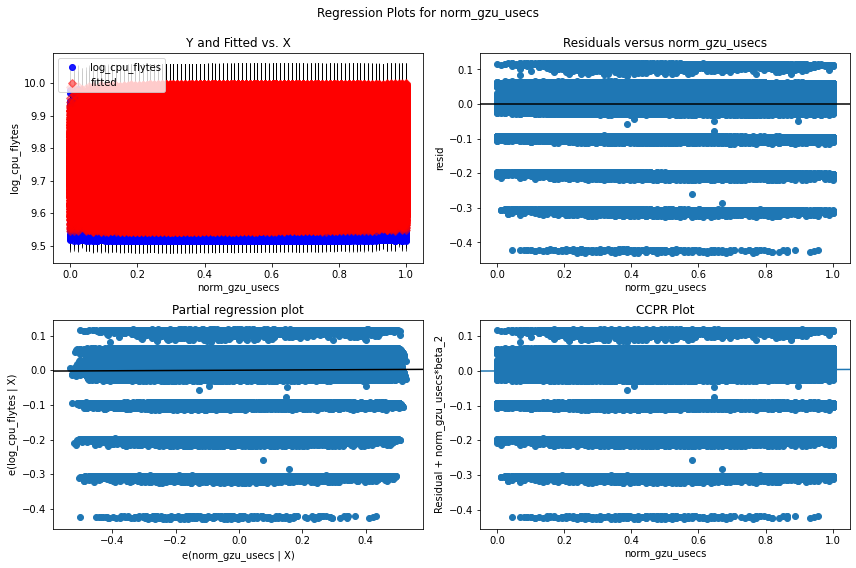

In [89]:
#create residual vs. predictor plot for 'norm_gzu_usecs '
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'norm_gzu_usecs', fig=fig)

### We conclude from the above residual plots that their is no such pattern in the residuals so the condition of linearity is satisfied.
### Also It is observed from the residual plot that the model is homoskedatic as no such deviation in variances of the residual plot is observed.

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

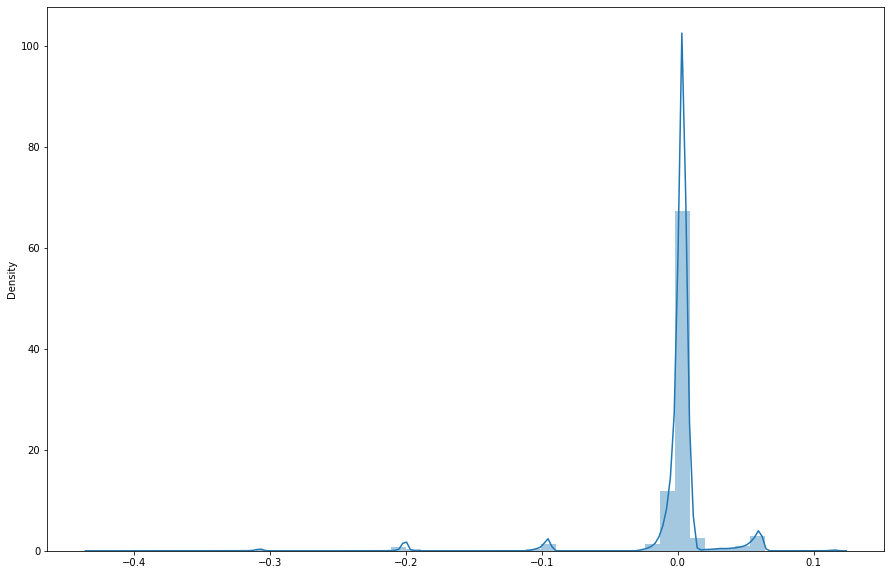

In [340]:
plt.figure(figsize=(15,10))
sns.distplot(model.resid)

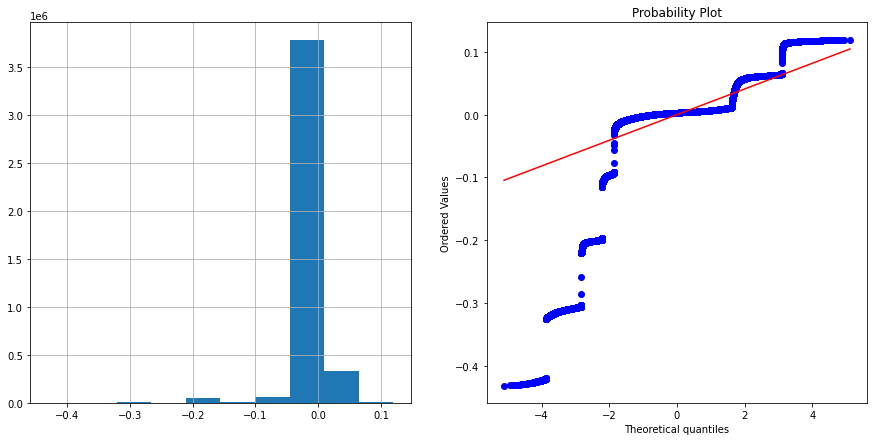

In [341]:
diagnostic_plot(model.resid)

In [343]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(model.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.417, p=0.000
Sample does not look Gaussian (reject H0)


/Users/grai/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## We can see from the above NPP plot or QQ plot and D'Agostino and Pearson's Test and Shapiro-Wilk Test that the normality assumption is violated.

# The normality test fails as the data is highly leptokurtic and not iid sample and hence high kurtosis causing this issue.

## Making a model without normalization

In [63]:
df_after_feature_engg.head()

,phtm_usecs,gzu_usecs,cpu_flytes,boxcox_mdt_application_usecs,system_buffer_&_hoc
115285,676,89,13905,1.717947,0
137433,675,120,13883,1.709624,0
152445,619,125,14146,1.702983,0
152634,595,153,13598,1.710922,0
152635,597,135,13643,1.715739,0


In [64]:
df_after_feature_engg.rename(columns={'system_buffer_&_hoc': 'system_buffer_hoc'},inplace=True) #here parameter columns is a dictionary

In [65]:
df_after_feature_engg.columns

Index(['phtm_usecs', 'gzu_usecs', 'cpu_flytes', 'boxcox_mdt_application_usecs',
       'system_buffer_hoc'],
      dtype='object')

In [66]:
#Taking log of cpu_flytes
df_after_feature_engg["log_cpu_flytes"]=np.log(df_after_feature_engg.cpu_flytes)
df_after_feature_engg.drop(["cpu_flytes"],axis=1,inplace=True)
df_after_feature_engg.head()

,phtm_usecs,gzu_usecs,boxcox_mdt_application_usecs,system_buffer_hoc,log_cpu_flytes
115285,676,89,1.717947,0,9.540004
137433,675,120,1.709624,0,9.538420
152445,619,125,1.702983,0,9.557187
152634,595,153,1.710922,0,9.517678
152635,597,135,1.715739,0,9.520982


In [69]:
#fit multiple linear regression model
model2 = ols('log_cpu_flytes ~ phtm_usecs + gzu_usecs + boxcox_mdt_application_usecs + system_buffer_hoc',data = df_after_feature_engg).fit()

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         log_cpu_flytes   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.314e+06
Date:                Wed, 14 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:06:14   Log-Likelihood:             8.6757e+06
No. Observations:             4307851   AIC:                        -1.735e+07
Df Residuals:                 4307846   BIC:                        -1.735e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

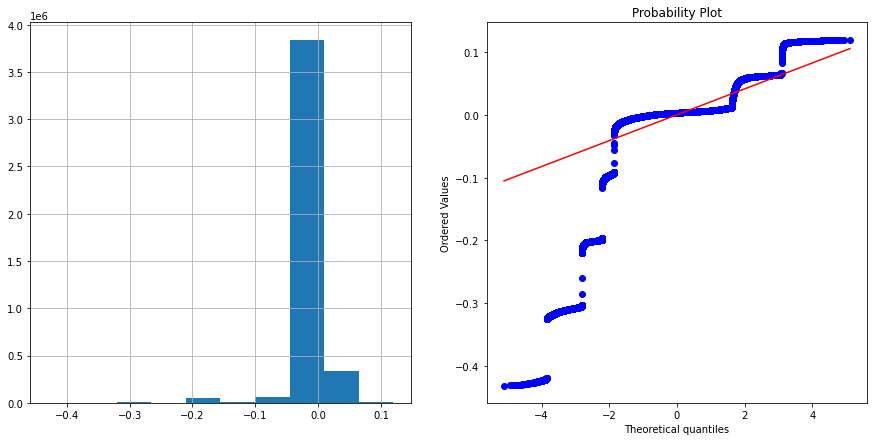

In [70]:
diagnostic_plot(model2.resid)

In [72]:
model2.conf_int(alpha=0.05)[1:]

,0,1
phtm_usecs,0.001735,0.001737
gzu_usecs,0.000045,0.000049
boxcox_mdt_application_usecs,0.080241,0.088544
system_buffer_hoc,-0.001422,-0.000734


# The value of coefficients with 95% confidence Interval are as follows:
## Features              Lower limit     Upper Limit  
### phtm_usecs                   [ 0.001735 ,	0.001737 ]
### gzu_usecs                     [ 0.000045 ,	0.000049 ]
### boxcox_mdt_application_usecs     [ 0.080241 ,	0.088544]
### system_buffer_hoc            [ 0.001422	 , 0.000734 ]